<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/P104_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Importing the Data

In [2]:
inf_rate = pd.read_csv('/content/INDIA INFLATION RATE.csv')
inf_rate

,Year,Inflation Rate (%),Annual Change,t,t2,log t
0,2020,6.62%,2.90%,1,1,-1.179142011
1,2019,3.72%,-0.22%,2,4,-1.42945706
2,2018,3.95%,0.62%,3,9,-1.403402904
3,2017,3.33%,-1.62%,4,16,-1.477555766
4,2016,4.95%,0.04%,5,25,-1.305394801
...,...,...,...,...,...,...
56,1964,13.36%,10.41%,57,3249,-0.874193542
57,1963,2.95%,-0.69%,58,3364,-1.530177984
58,1962,3.63%,1.94%,59,3481,-1.440093375
59,1961,1.70%,-0.08%,60,3600,-1.769551079


## 3. Data Understanding

In [3]:
inf_rate.shape

(61, 6)

In [4]:
inf_rate.dtypes

Year                   int64
Inflation Rate (%)    object
Annual Change         object
t                      int64
t2                     int64
log t                 object
dtype: object

In [5]:
inf_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                61 non-null     int64 
 1   Inflation Rate (%)  61 non-null     object
 2   Annual Change       61 non-null     object
 3   t                   61 non-null     int64 
 4   t2                  61 non-null     int64 
 5   log t               61 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.0+ KB


In [6]:
inf_rate.describe(include='all')

,Year,Inflation Rate (%),Annual Change,t,t2,log t
count,61.000000,61,61,61.000000,61.00000,61
unique,NaN,61,59,NaN,NaN,60
top,NaN,6.62%,-0.08%,NaN,NaN,#NUM!
freq,NaN,1,2,NaN,NaN,2
mean,1990.000000,NaN,NaN,31.000000,1271.00000,NaN
std,17.752934,NaN,NaN,17.752934,1135.60511,NaN
min,1960.000000,NaN,NaN,1.000000,1.00000,NaN
25%,1975.000000,NaN,NaN,16.000000,256.00000,NaN
50%,1990.000000,NaN,NaN,31.000000,961.00000,NaN
75%,2005.000000,NaN,NaN,46.000000,2116.00000,NaN


## 4. Data Cleaning

In [7]:
inf_rate.rename(columns={'Inflation Rate (%)':'Inflation_Rate(%)','Annual Change':'Annual_Change(%)'},inplace=True)

In [8]:
inf_rate['Inflation_Rate(%)'].replace("%", ' ', regex=True, inplace=True)
inf_rate['Annual_Change(%)'].replace("%", ' ', regex=True, inplace=True)

In [9]:
inf_rate

,Year,Inflation_Rate(%),Annual_Change(%),t,t2,log t
0,2020,6.62,2.90,1,1,-1.179142011
1,2019,3.72,-0.22,2,4,-1.42945706
2,2018,3.95,0.62,3,9,-1.403402904
3,2017,3.33,-1.62,4,16,-1.477555766
4,2016,4.95,0.04,5,25,-1.305394801
...,...,...,...,...,...,...
56,1964,13.36,10.41,57,3249,-0.874193542
57,1963,2.95,-0.69,58,3364,-1.530177984
58,1962,3.63,1.94,59,3481,-1.440093375
59,1961,1.70,-0.08,60,3600,-1.769551079


In [11]:
inf_rate['Inflation_Rate(%)']=inf_rate['Inflation_Rate(%)'].astype(float)
inf_rate['Annual_Change(%)']=inf_rate['Annual_Change(%)'].astype(float)


In [12]:
inf_rate.dtypes

Year                   int64
Inflation_Rate(%)    float64
Annual_Change(%)     float64
t                      int64
t2                     int64
log t                 object
dtype: object

## 5. Data Visualization

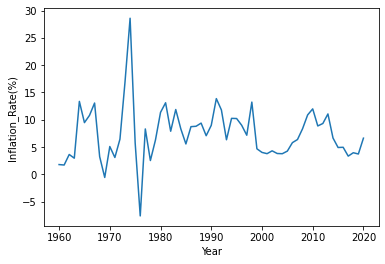

In [13]:
sns.lineplot(data=inf_rate, x="Year", y="Inflation_Rate(%)")

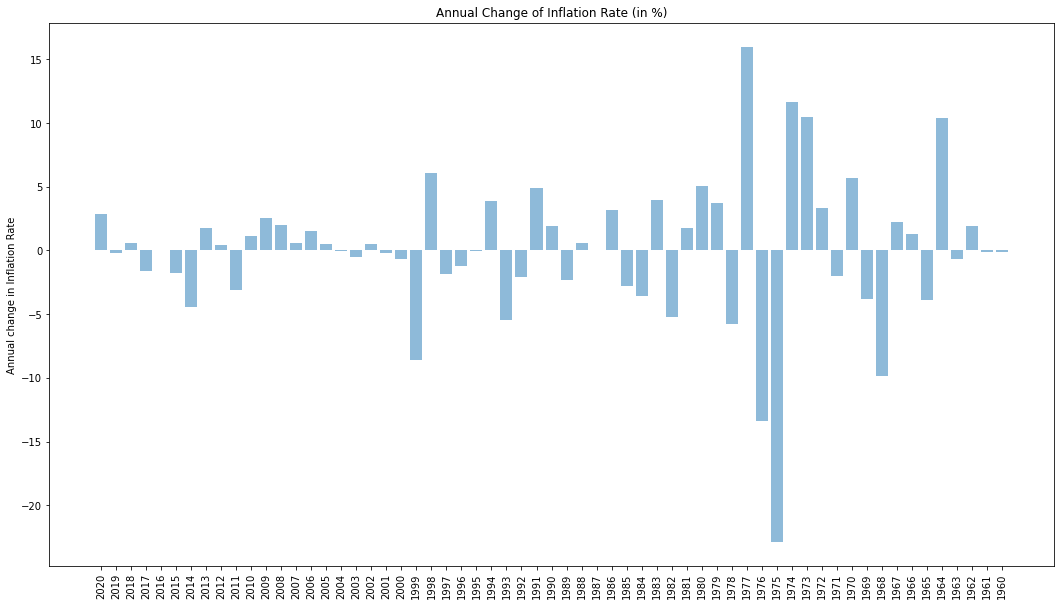

In [14]:
plt.figure(figsize=(18,10))
x = inf_rate['Year']
x_pos = np.arange(len(x))
y = inf_rate['Annual_Change(%)']

plt.bar(x_pos, y, align='center', alpha=0.5)
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('Annual change in Inflation Rate')
plt.title('Annual Change of Inflation Rate (in %)')
plt.show()

In [15]:
#Setting the year as index
inf_rate = inf_rate.set_index('Year')
inf_rate.index

Int64Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
            2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
            1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
            1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
            1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
            1965, 1964, 1963, 1962, 1961, 1960],
           dtype='int64', name='Year')

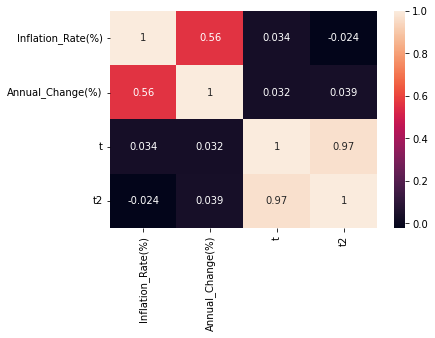

In [16]:
inf_rate.corr()
sns.heatmap(inf_rate.corr(),annot=True)
plt.show()

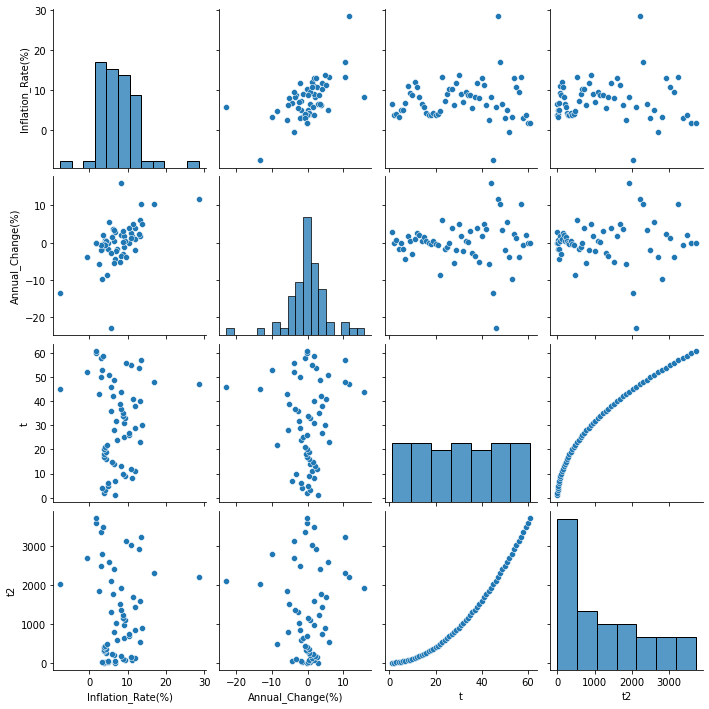

In [17]:
sns.pairplot(inf_rate)


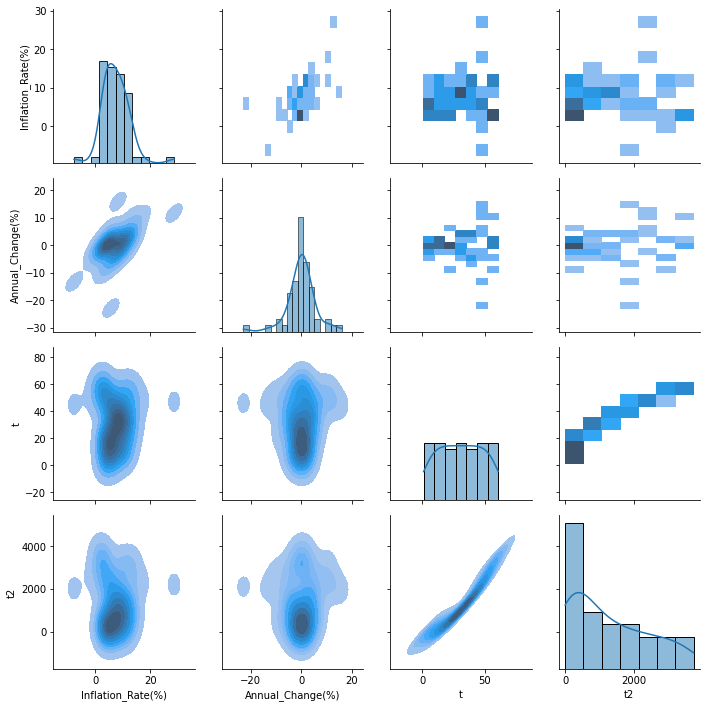

In [18]:
g = sns.PairGrid(inf_rate)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


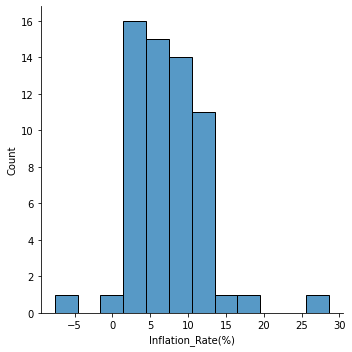

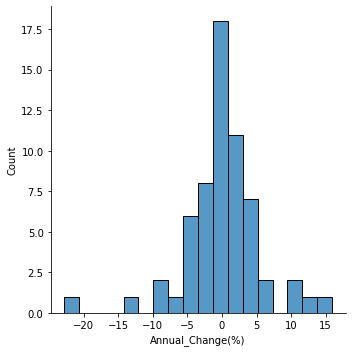

In [19]:
sns.displot(inf_rate, x="Inflation_Rate(%)")
sns.displot(inf_rate, x="Annual_Change(%)")

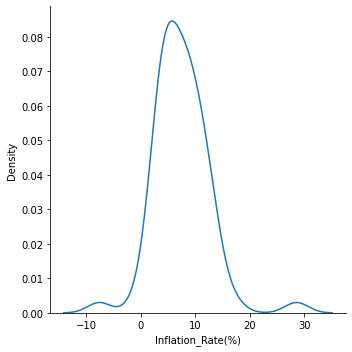

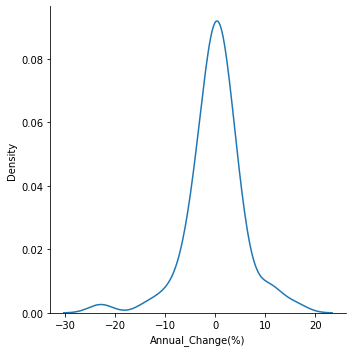

In [20]:
#Kernel density estimation
sns.displot(inf_rate, x="Inflation_Rate(%)", kind="kde")
sns.displot(inf_rate, x="Annual_Change(%)", kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


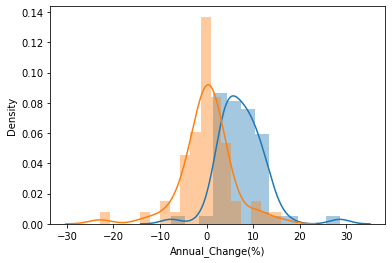

In [21]:
sns.distplot(inf_rate["Inflation_Rate(%)"])
sns.distplot(inf_rate["Annual_Change(%)"])

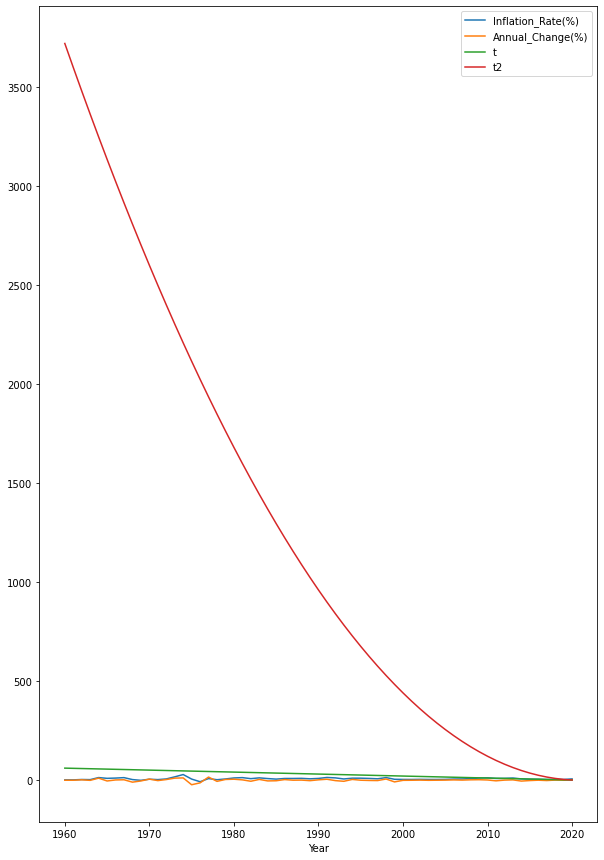

In [22]:
inf_rate.plot(figsize = (10,15))

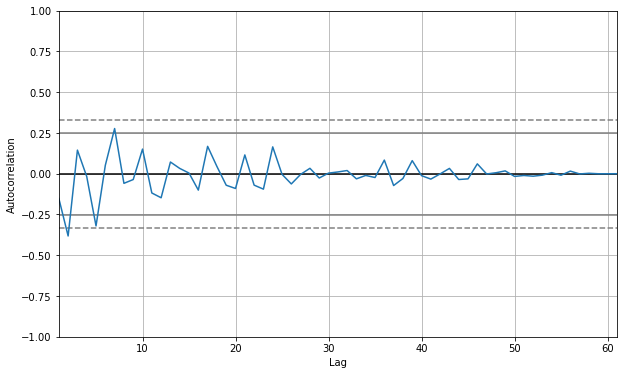

In [27]:
autocorrelation_plot(inf_rate['Annual_Change(%)'])

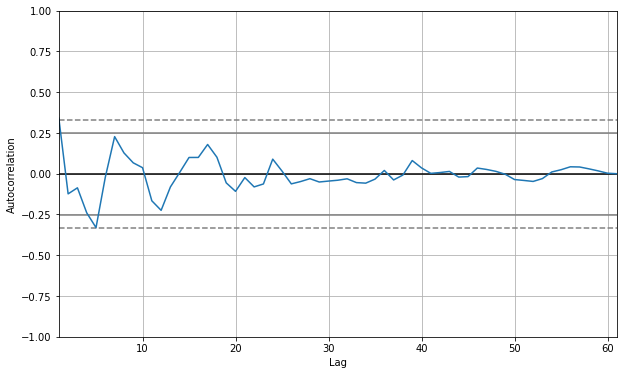

In [29]:
autocorrelation_plot(inf_rate['Inflation_Rate(%)'])

* Autocorrelation, also known as serial correlation, refers to the degree of correlation of the same variables between two successive time intervals.
* The value of autocorrelation ranges from -1 to 1. A value between -1 and 0 represents negative autocorrelation. A value between 0 and 1 represents positive autocorrelation.
* Autocorrelation gives information about the trend of a set of historical data, so it can be useful in the technical analysis for the equity market.

###### Autocorrelation and Partial Autocorrelation Plot: (ACF&PACF)
These are important plots for time series. They graphically summarize the strength of the relationships of observations in time series.
###### Autocorrelation Plot:
In Autocorrelation, we calculate the correlation for time-series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, hence are called a serial correlation or an autocorrelation.

The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. In simple terms, The ‘kth’ lag is the time period that happened “k” time points before the time I. You can optionally set in how many lags you want to observe.

The Autocorrelation Plot is used in a forecasting model for time series called Moving Averages

###### PartialAutocorrelation Plot:
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. Meaning… The effects of the lags in between are removed and we can see the direct impact a previous observation has on the value to be predicted at a time(t).

PACF can be computed by regression.

Regression is a statistical method to determine the strength and character of the relationship between one dependant value and other variables that are independent.

The PACF plot is used in the AutoRegressive Model for forecasting


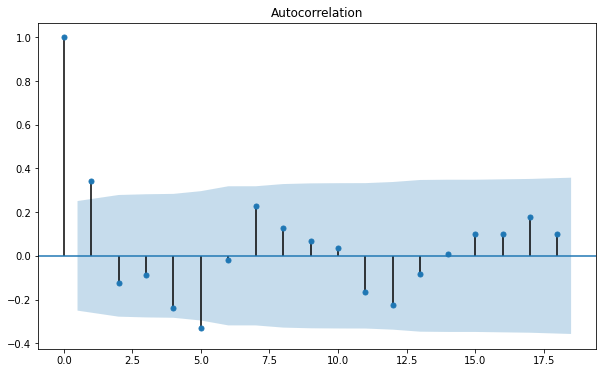

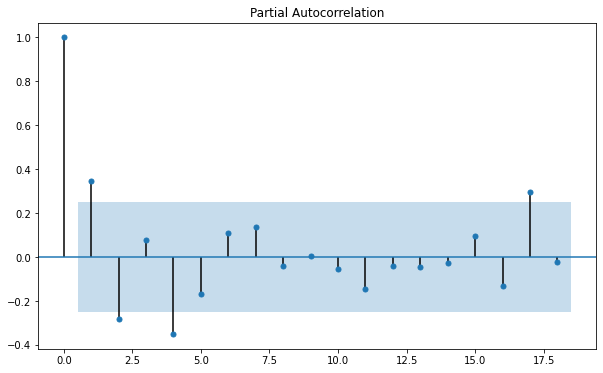

In [24]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(inf_rate['Inflation_Rate(%)']);
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(inf_rate['Inflation_Rate(%)']);

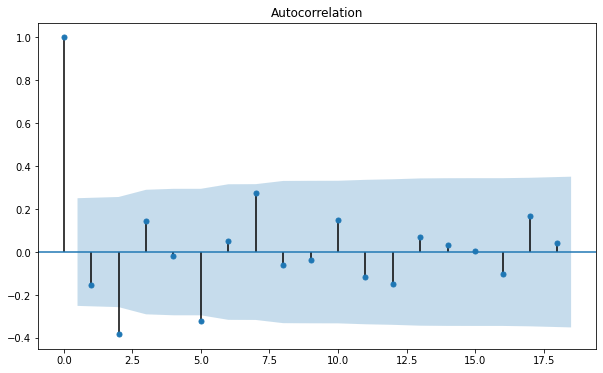

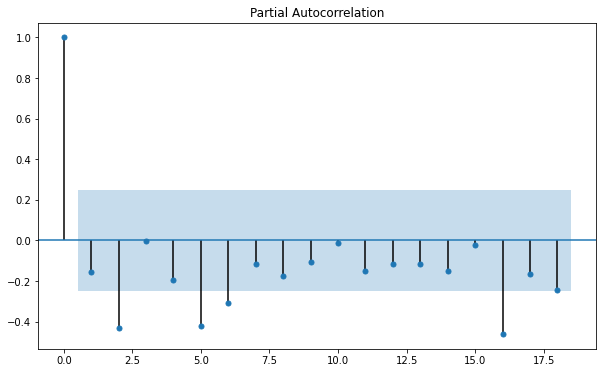

In [25]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(inf_rate['Annual_Change(%)']);
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(inf_rate['Annual_Change(%)']);

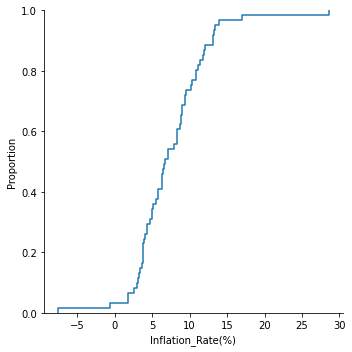

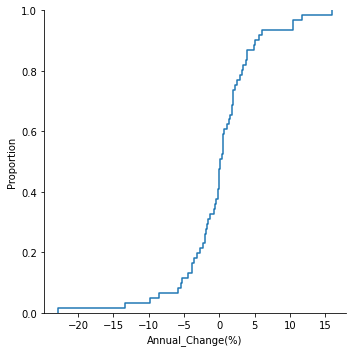

In [30]:
#Empirical cumulative distributions
sns.displot(inf_rate, x="Inflation_Rate(%)", kind="ecdf")
sns.displot(inf_rate, x="Annual_Change(%)", kind="ecdf")

In [ ]:
SPLITTING DATA

In [31]:
inf_rate

,Inflation_Rate(%),Annual_Change(%),t,t2,log t
Year,,,,,
2020,6.62,2.90,1,1,-1.179142011
2019,3.72,-0.22,2,4,-1.42945706
2018,3.95,0.62,3,9,-1.403402904
2017,3.33,-1.62,4,16,-1.477555766
2016,4.95,0.04,5,25,-1.305394801
...,...,...,...,...,...
1964,13.36,10.41,57,3249,-0.874193542
1963,2.95,-0.69,58,3364,-1.530177984
1962,3.63,1.94,59,3481,-1.440093375


In [32]:
Train= inf_rate.head(51)
Test= inf_rate.tail(10)
Train


,Inflation_Rate(%),Annual_Change(%),t,t2,log t
Year,,,,,
2020,6.62,2.90,1,1,-1.179142011
2019,3.72,-0.22,2,4,-1.42945706
2018,3.95,0.62,3,9,-1.403402904
2017,3.33,-1.62,4,16,-1.477555766
2016,4.95,0.04,5,25,-1.305394801
2015,4.91,-1.74,6,36,-1.308918508
2014,6.65,-4.41,7,49,-1.177178355
2013,11.06,1.75,8,64,-0.956244873
2012,9.31,0.45,9,81,-1.031050319


In [33]:
Test

,Inflation_Rate(%),Annual_Change(%),t,t2,log t
Year,,,,,
1969,-0.58,-3.82,52,2704,#NUM!
1968,3.24,-9.82,53,2809,-1.48945499
1967,13.06,2.26,54,2916,-0.884056823
1966,10.80,1.33,55,3025,-0.966576245
1965,9.47,-3.88,56,3136,-1.023650021
1964,13.36,10.41,57,3249,-0.874193542
1963,2.95,-0.69,58,3364,-1.530177984
1962,3.63,1.94,59,3481,-1.440093375
1961,1.70,-0.08,60,3600,-1.769551079
